In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [21]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [7]:
df.shape

(10000, 14)

In [10]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [24]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [16]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [28]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [29]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [33]:
x=df.drop(columns=["Exited"])
y=df["Exited"]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sacled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [66]:
#Sequential model
Model=Sequential()
Model.add(Dense(6,activation='relu',input_dim=11))
Model.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
Model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [86]:
history=Model.fit(x_train_sacled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3363 - val_accuracy: 0.8744 - val_loss: 0.3220
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3282 - val_accuracy: 0.8756 - val_loss: 0.3221
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.3223 - val_accuracy: 0.8750 - val_loss: 0.3240
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3446 - val_accuracy: 0.8756 - val_loss: 0.3222
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3361 - val_accuracy: 0.8744 - val_loss: 0.3228
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3359 - val_accuracy: 0.8737 - val_loss: 0.3219
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3422 - val_accuracy: 0.8731 - val_loss: 0.3231
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3346 - val_accu

In [78]:
Model.layers[0].get_weights()

[array([[-0.10507032,  0.12145554,  0.23557575,  0.12366146,  0.12357051,
         -0.04135812],
        [ 0.10266725, -1.3913599 , -0.4493353 , -0.20252265,  0.33112714,
          0.26598832],
        [ 0.21977852, -0.11937141, -0.13326597, -0.05573107,  0.14862636,
         -0.18116003],
        [ 0.3025919 , -0.13565694,  0.13167867, -0.6710831 , -0.22497599,
          0.68398887],
        [ 1.1886104 ,  0.06412967,  1.3473788 , -1.0908476 ,  0.8364069 ,
          0.9511131 ],
        [-0.07431776, -0.0476487 , -0.07999679, -0.06622451,  0.03860889,
          0.09104553],
        [-0.3208445 , -0.7998193 ,  0.21033391, -0.99813974,  0.3524689 ,
         -0.8445778 ],
        [ 0.17285319,  0.01141272, -0.12684672,  0.00397394, -0.10344328,
         -0.20752244],
        [-0.47800174, -0.01647275, -0.3147035 ,  0.3555082 , -0.30255726,
          0.03554584],
        [ 0.22548778, -0.04949965, -0.04550052,  0.06592548,  0.1367418 ,
         -0.08598515],
        [-0.05097007,  0.08733

In [80]:
Model.layers[1].get_weights()

[array([[ 1.5084798 ],
        [-1.2529584 ],
        [ 1.4078535 ],
        [ 1.1304396 ],
        [-0.8327597 ],
        [ 0.80889595]], dtype=float32),
 array([-0.24153613], dtype=float32)]

In [81]:
y_pred=Model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [83]:
y_pred=np.where(y_pred>0.5,1,0)

In [84]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [85]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8615


In [87]:
history

In [88]:
import matplotlib.pyplot as plt

In [89]:
history.history

{'accuracy': [0.8618749976158142,
  0.8604687452316284,
  0.8606250286102295,
  0.8618749976158142,
  0.8610937595367432,
  0.8596875071525574,
  0.8590624928474426,
  0.8595312237739563,
  0.8617187738418579,
  0.8600000143051147,
  0.8609374761581421,
  0.8595312237739563,
  0.8595312237739563,
  0.8596875071525574,
  0.8607812523841858,
  0.8596875071525574,
  0.8598437309265137,
  0.8584374785423279,
  0.8589062690734863,
  0.8603125214576721,
  0.8598437309265137,
  0.8603125214576721,
  0.8582812547683716,
  0.8603125214576721,
  0.8592187762260437,
  0.8610937595367432,
  0.8615624904632568,
  0.8606250286102295,
  0.8620312213897705,
  0.8606250286102295,
  0.8604687452316284,
  0.8600000143051147,
  0.8604687452316284,
  0.8598437309265137,
  0.8615624904632568,
  0.8606250286102295,
  0.8606250286102295,
  0.8603125214576721,
  0.8610937595367432,
  0.859375,
  0.8598437309265137,
  0.8603125214576721,
  0.8592187762260437,
  0.8600000143051147,
  0.8589062690734863,
  0.8609

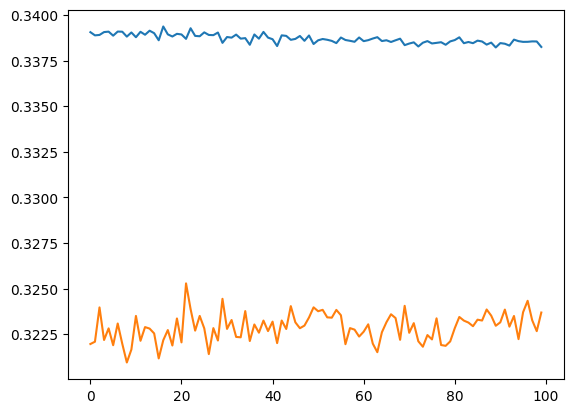

In [92]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

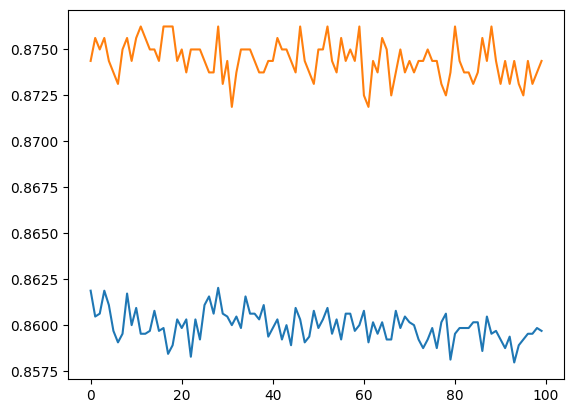

In [95]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])